In [2]:
import pandas as pd

df = pd.read_csv(
    "chronic_kidney_disease.csv",
    on_bad_lines='skip'   # skips malformed rows
)
df.head()
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     397 non-null    object
 1   bp      397 non-null    object
 2   sg      397 non-null    object
 3   al      397 non-null    object
 4   su      397 non-null    object
 5   rbc     397 non-null    object
 6   pc      397 non-null    object
 7   pcc     397 non-null    object
 8   ba      397 non-null    object
 9   bgr     397 non-null    object
 10  bu      397 non-null    object
 11  sc      397 non-null    object
 12  sod     397 non-null    object
 13  pot     397 non-null    object
 14  hemo    397 non-null    object
 15  pcv     397 non-null    object
 16  wbcc    397 non-null    object
 17  rbcc    397 non-null    object
 18  htn     397 non-null    object
 19  dm      397 non-null    object
 20  cad     397 non-null    object
 21  appet   397 non-null    object
 22  pe      397 non-null    ob

In [3]:
import numpy as np

df.replace('?', np.nan, inplace=True)

In [4]:
df = df.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)

In [5]:
num_cols = [
    'age','bp','bgr','bu','sc','sod','pot',
    'hemo','pcv','wbcc','rbcc'
]

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

In [6]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     388 non-null    float64
 1   bp      385 non-null    float64
 2   bgr     354 non-null    float64
 3   bu      378 non-null    float64
 4   sc      380 non-null    float64
 5   sod     312 non-null    float64
 6   pot     311 non-null    float64
 7   hemo    345 non-null    float64
 8   pcv     327 non-null    float64
 9   wbcc    292 non-null    float64
 10  rbcc    267 non-null    float64
dtypes: float64(11)
memory usage: 34.2 KB


In [7]:
cat_cols = [
    'sg','al','su','rbc','pc','pcc','ba',
    'htn','dm','cad','appet','pe','ane'
]

In [8]:
df['class'] = df['class'].map({'ckd': 1, 'notckd': 0})

In [9]:
df['class'].value_counts()

class
1    248
0    149
Name: count, dtype: int64

In [10]:
missing_pct = df.isna().mean().sort_values(ascending=False) * 100
missing_pct

rbc      37.783375
rbcc     32.745592
wbcc     26.448363
pot      21.662469
sod      21.410579
pcv      17.632242
pc       16.372796
hemo     13.098237
su       12.342569
sg       11.838791
al       11.586902
bgr      10.831234
bu        4.785894
sc        4.282116
bp        3.022670
age       2.267003
pcc       1.007557
ba        1.007557
htn       0.503778
dm        0.503778
cad       0.503778
appet     0.251889
pe        0.251889
ane       0.251889
class     0.000000
dtype: float64

In [11]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


In [12]:
df.isna().sum()


age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

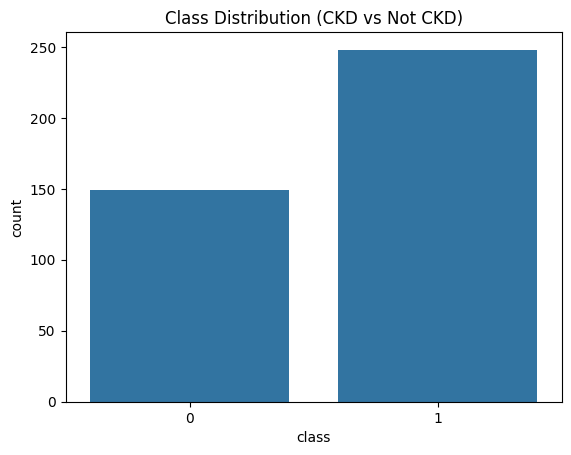

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=df)
plt.title("Class Distribution (CKD vs Not CKD)")
plt.show()


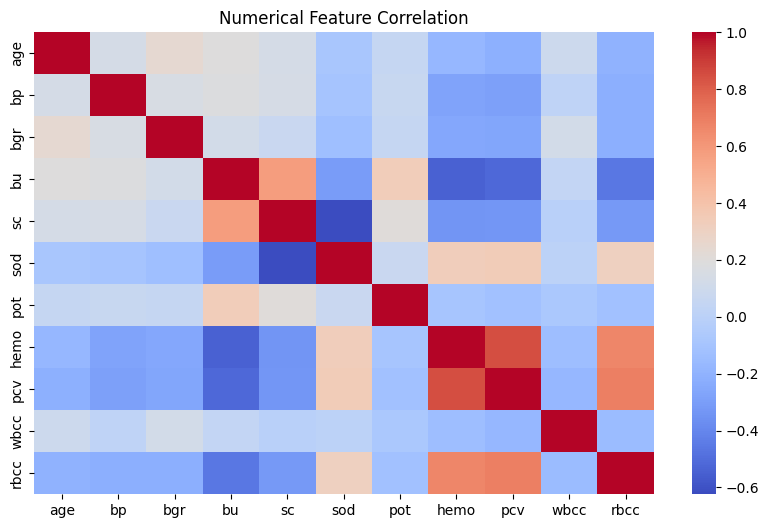

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), cmap='coolwarm')
plt.title("Numerical Feature Correlation")
plt.show()


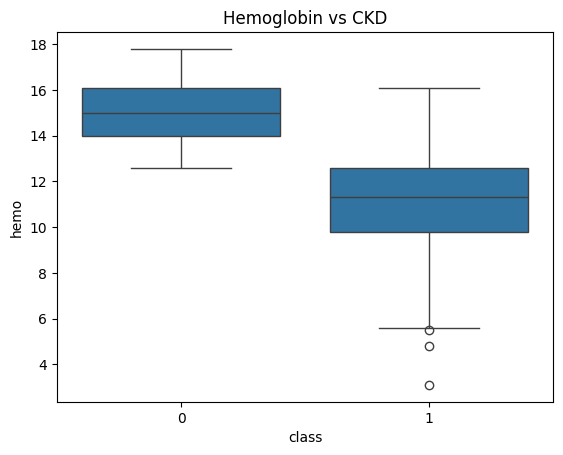

In [15]:
sns.boxplot(x='class', y='hemo', data=df)
plt.title("Hemoglobin vs CKD")
plt.show()


In [16]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


In [17]:
Q1 = df['bp'].quantile(0.25)
Q3 = df['bp'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['bp'] < Q1 - 1.5*IQR) | (df['bp'] > Q3 + 1.5*IQR)]


In [18]:
df['bp'] = df['bp'].clip(80, 200)
df['sc'] = df['sc'].clip(0.5, 15)


In [19]:
binary_map = {
    'yes': 1, 'no': 0,
    'ckd': 1, 'notckd': 0,
    'normal': 1, 'abnormal': 0,
    'present': 1, 'notpresent': 0,
    'good': 1, 'poor': 0
}

df.replace(binary_map, inplace=True)


C:\Users\Vishal\AppData\Local\Temp\ipykernel_18308\2001406069.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(binary_map, inplace=True)


In [20]:
df.dtypes


age      float64
bp       float64
sg        object
al        object
su        object
rbc        int64
pc         int64
pcc        int64
ba         int64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn        int64
dm         int64
cad        int64
appet      int64
pe         int64
ane        int64
class      int64
dtype: object

In [21]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ['sg', 'al', 'su']

encoder = OrdinalEncoder()
df[ordinal_cols] = encoder.fit_transform(df[ordinal_cols])


In [22]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc        int64
pc         int64
pcc        int64
ba         int64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn        int64
dm         int64
cad        int64
appet      int64
pe         int64
ane        int64
class      int64
dtype: object

In [23]:
from sklearn.preprocessing import StandardScaler

X = df.drop('class', axis=1)
y = df['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 1.0
[[30  0]
 [ 0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
[[30  0]
 [ 0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [27]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9875
[[30  0]
 [ 1 49]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [28]:
model_scores = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

model_scores


{'Logistic Regression': 1.0, 'Random Forest': 1.0, 'SVM': 0.9875}

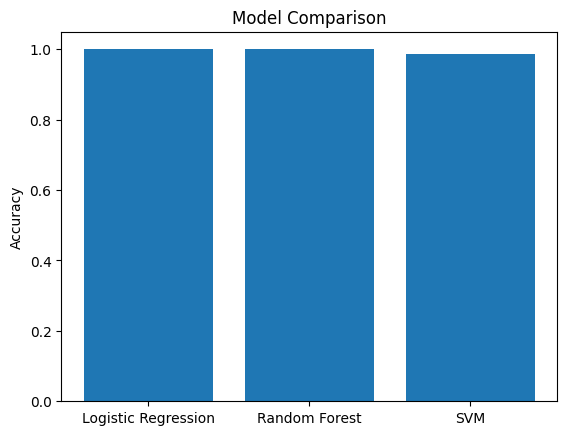

In [29]:
import matplotlib.pyplot as plt

plt.bar(model_scores.keys(), model_scores.values())
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()


In [30]:
import pandas as pd

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


hemo    0.172229
pcv     0.165751
sc      0.129579
sg      0.127861
rbcc    0.108469
htn     0.061182
al      0.054056
dm      0.038750
sod     0.031067
bu      0.024480
dtype: float64

In [31]:
#Now we will predict whether a person has chronic kidney disease or not with the help of our model

In [32]:
binary_map = {
    'yes': 1, 'no': 0,
    'normal': 1, 'abnormal': 0,
    'present': 1, 'notpresent': 0,
    'good': 1, 'poor': 0
}

# Ordinal maps (VERY IMPORTANT)
sg_map = {
    1.005: 0, 1.010: 1, 1.015: 2, 1.020: 3, 1.025: 4
}

al_su_map = {
    0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5
}


In [33]:
def preprocess_input(input_data):
    processed = {}

    for key, value in input_data.items():

        # Binary categorical
        if isinstance(value, str):
            processed[key] = binary_map[value.lower()]

        # Specific gravity
        elif key == 'sg':
            processed[key] = sg_map[value]

        # Albumin / Sugar
        elif key in ['al', 'su']:
            processed[key] = al_su_map[value]

        # Numeric values
        else:
            processed[key] = float(value)

    return processed


In [39]:
#this is our prediction function
def predict_ckd_real(input_data):
    processed = preprocess_input(input_data)
    values_df = pd.DataFrame([processed], columns=FEATURE_ORDER)
    values_scaled = scaler.transform(values_df)
    pred = rf.predict(values_scaled)[0]
    return "Chronic Kideny Disease Detected" if pred == 1 else "No CKD Detected"


In [43]:
FEATURE_ORDER = list(X.columns)

# here we can change the inputs to identify whether a person has ckd or not 
unhealthy_patient = {
    'age': 48,
    'bp': 80,
    'sg': 1.020,
    'al': 1,
    'su': 0,
    'rbc': 'normal',
    'pc': 'normal',
    'pcc': 'notpresent',
    'ba': 'notpresent',
    'bgr': 121,
    'bu': 36,
    'sc': 1.2,
    'sod': 135,
    'pot': 4.2,
    'hemo': 15.4,
    'pcv': 44,
    'wbcc': 7800,
    'rbcc': 5.2,
    'htn': 'yes',
    'dm': 'yes',
    'cad': 'no',
    'appet': 'good',
    'pe': 'no',
    'ane': 'no'
}

predict_ckd_real(unhealthy_patient)


'Chronic Kideny Disease Detected'

In [44]:
healthy_person = {
    'age': 32,
    'bp': 72,
    'sg': 1.025,         
    'al': 0,              
    'su': 0,               
    'rbc': 'normal',
    'pc': 'normal',
    'pcc': 'notpresent',
    'ba': 'notpresent',
    'bgr': 92,            
    'bu': 18,             
    'sc': 0.8,            
    'sod': 140,
    'pot': 4.1,
    'hemo': 15.8,        
    'pcv': 46,
    'wbcc': 6500,
    'rbcc': 5.1,
    'htn': 'no',
    'dm': 'no',
    'cad': 'no',
    'appet': 'good',
    'pe': 'no',
    'ane': 'no'
}
predict_ckd_real(healthy_person)

'No CKD Detected'